<a href="https://colab.research.google.com/github/BandaSahithi18/NLP/blob/main/NLP_lab4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
import pandas as pd
import numpy as np
import re
import nltk
import matplotlib.pyplot as plt

from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer

from sklearn.feature_extraction.text import TfidfVectorizer

In [6]:
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


True

In [7]:
df = pd.read_csv("Tweets.csv")

# Inspect data
df[['text', 'airline_sentiment']].head()

,text,airline_sentiment
0,@VirginAmerica What @dhepburn said.,neutral
1,@VirginAmerica plus you've added commercials t...,positive
2,@VirginAmerica I didn't today... Must mean I n...,neutral
3,@VirginAmerica it's really aggressive to blast...,negative
4,@VirginAmerica and it's a really big bad thing...,negative


In [9]:
stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

def preprocess_text(text):
    # Lowercase
    text = text.lower()

    # Remove HTML tags
    text = re.sub(r'<.*?>', '', text)

    # Remove punctuation and numbers
    text = re.sub(r'[^a-z\s]', '', text)

    # Tokenization
    tokens = word_tokenize(text)

    # Stopword removal + lemmatization
    tokens = [
        lemmatizer.lemmatize(word)
        for word in tokens
        if word not in stop_words and len(word) > 2
    ]

    return " ".join(tokens)
df['clean_text'] = df['text'].apply(preprocess_text)
df[['clean_text', 'airline_sentiment']].head()
positive_reviews = df[df['airline_sentiment'] == 'positive']['clean_text']
negative_reviews = df[df['airline_sentiment'] == 'negative']['clean_text']
neutral_reviews  = df[df['airline_sentiment'] == 'neutral']['clean_text']
tfidf_pos = TfidfVectorizer(max_features=500)
tfidf_neg = TfidfVectorizer(max_features=500)
tfidf_neu = TfidfVectorizer(max_features=500)

X_pos = tfidf_pos.fit_transform(positive_reviews)
X_neg = tfidf_neg.fit_transform(negative_reviews)
X_neu = tfidf_neu.fit_transform(neutral_reviews)

In [10]:
df['clean_text'] = df['text'].apply(preprocess_text)
df[['clean_text', 'airline_sentiment']].head()

,clean_text,airline_sentiment
0,virginamerica dhepburn said,neutral
1,virginamerica plus youve added commercial expe...,positive
2,virginamerica didnt today must mean need take ...,neutral
3,virginamerica really aggressive blast obnoxiou...,negative
4,virginamerica really big bad thing,negative


In [13]:
def get_top_tfidf_words(tfidf_matrix, vectorizer, top_n=15):
    feature_names = np.array(vectorizer.get_feature_names_out())
    avg_tfidf = tfidf_matrix.mean(axis=0).A1
    top_indices = avg_tfidf.argsort()[::-1][:top_n]
    return feature_names[top_indices], avg_tfidf[top_indices]
pos_words, pos_scores = get_top_tfidf_words(X_pos, tfidf_pos)
neg_words, neg_scores = get_top_tfidf_words(X_neg, tfidf_neg)
neu_words, neu_scores = get_top_tfidf_words(X_neu, tfidf_neu)

print("Top Positive Words:", pos_words)
print("Top Negative Words:", neg_words)
print("Top Neutral Words:", neu_words)

Top Positive Words: ['jetblue' 'southwestair' 'united' 'thanks' 'thank' 'flight' 'great'
 'virginamerica' 'love' 'guy' 'service' 'much' 'airline' 'awesome' 'best']
Top Negative Words: ['united' 'flight' 'southwestair' 'jetblue' 'hour' 'get' 'customer'
 'cancelled' 'service' 'time' 'bag' 'delayed' 'plane' 'help' 'one']
Top Neutral Words: ['jetblue' 'united' 'southwestair' 'flight' 'virginamerica' 'fleek'
 'fleet' 'get' 'thanks' 'please' 'need' 'help' 'would' 'know' 'tomorrow']


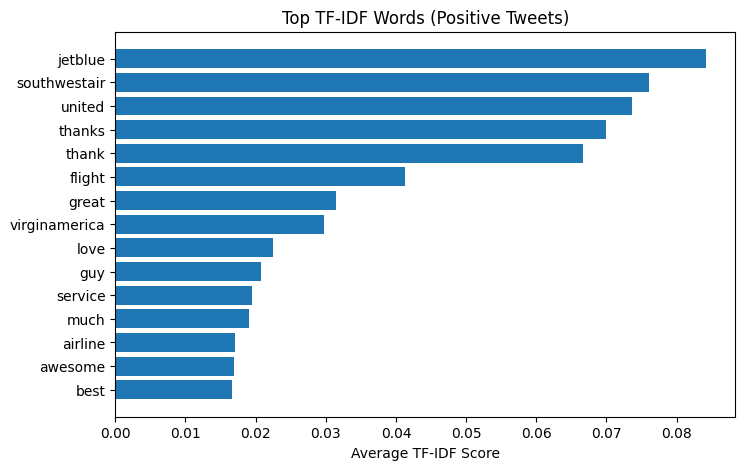

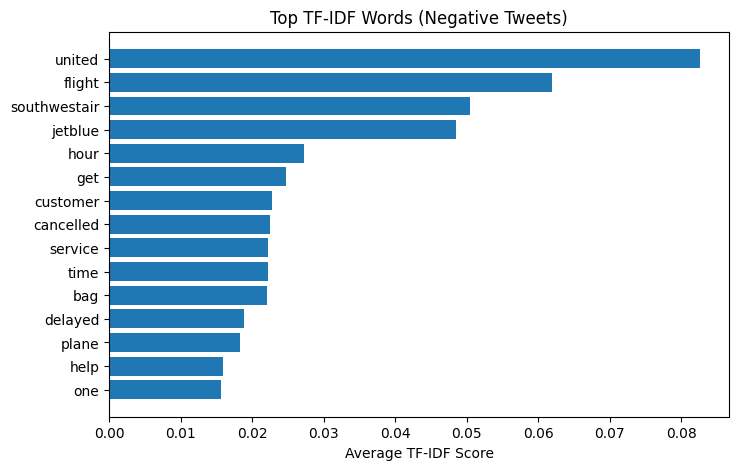

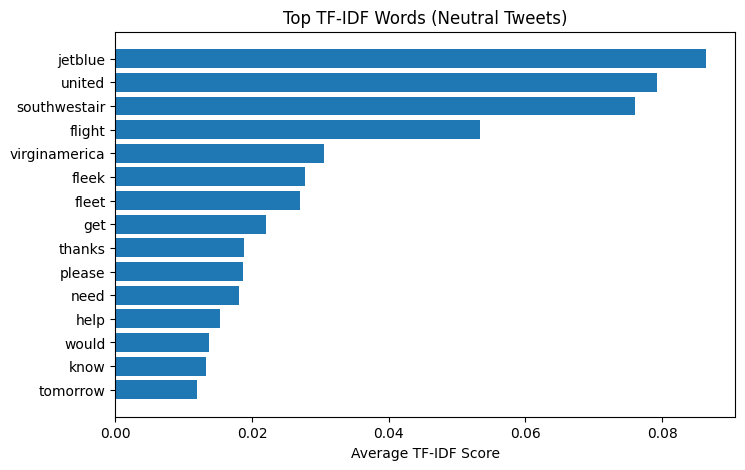

In [14]:
def plot_top_words(words, scores, title):
    plt.figure(figsize=(8, 5))
    plt.barh(words, scores)
    plt.gca().invert_yaxis()
    plt.title(title)
    plt.xlabel("Average TF-IDF Score")
    plt.show()
plot_top_words(pos_words, pos_scores, "Top TF-IDF Words (Positive Tweets)")
plot_top_words(neg_words, neg_scores, "Top TF-IDF Words (Negative Tweets)")
plot_top_words(neu_words, neu_scores, "Top TF-IDF Words (Neutral Tweets)")